## Transfer Learning with fastai by Andrew A. Borkowski, MD

### Part 1. Model Training and Evaluation

In [1]:
# install fastai library
!pip install -Uqq fastbook

In [2]:
# import libraries
from fastai import *
from fastai.vision.all import *
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import PIL.Image
print(PIL.__version__)

8.2.0


In [3]:
import warnings  
warnings.filterwarnings('ignore')

In [4]:
# specify path to your data
path = 'data'

In [5]:
# create dataloader
dls = ImageDataLoaders.from_folder(
path,
train='train',
valid='valid',
item_tfms=Resize(224),
batch_tfms=None,
bs=32,
val_bs=32
)

In [7]:
# create you trasfer learning model with ResNet50
learn = cnn_learner(dls, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/azureuser/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [8]:
learn.summary()

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                        

In [9]:
# train the classifier of your ML model
learn.fit_one_cycle(10)

In [10]:
learn.export()

In [11]:
del learn

### Part 2. Model Evaluation on Testing (Unseen) Data

In [12]:
learn = load_learner('data/export.pkl')

In [13]:
files = get_image_files('data/test')
test_dl = learn.dls.test_dl(files, with_labels=True)
preds, y_true = learn.get_preds(dl=test_dl)
y_pred = torch.argmax(preds, dim=1)

In [14]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[25,  0],
       [ 0, 25]])

In [15]:
# calculater sensitivity, specificity, positive predictive value, negative predictive value
cm = confusion_matrix(y_true, y_pred)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
sensitivity = (TP/(TP + FN))*100
specificity = (TN/(TN + FP))*100
PPV = (TP/(TP + FP))*100
NPV = (TN/(TN + FN))*100
print(f'Sensitivity:              {sensitivity: .2f}%')
print(f'Specificity:              {specificity: .2f}%')
print(f'Positive predictive value:{PPV: .2f}%')
print(f'Negative predictive value:{NPV: .2f}%')

Sensitivity:               100.00%
Specificity:               100.00%
Positive predictive value: 100.00%
Negative predictive value: 100.00%


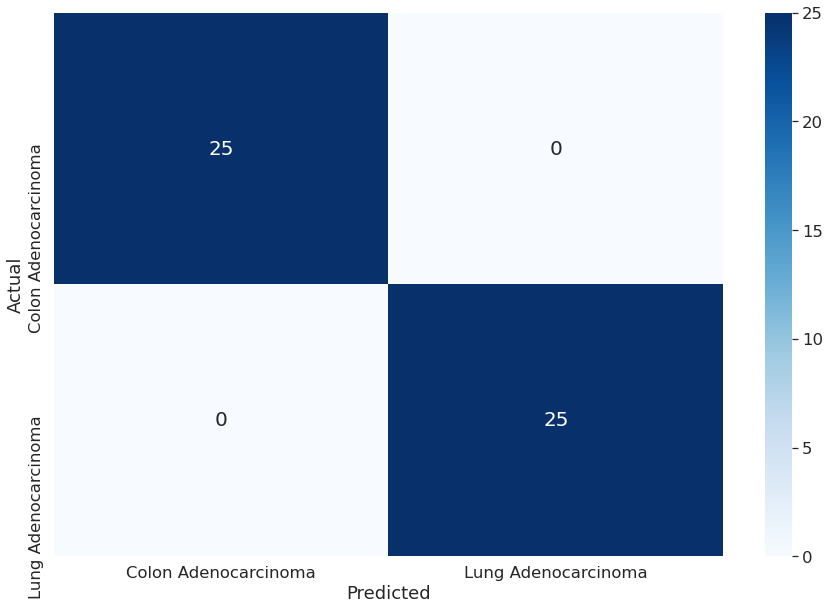

In [16]:
# plot confusion matrix
df_cm = pd.DataFrame(cm, 
    columns=['Colon Adenocarcinoma', 'Lung Adenocarcinoma'], 
    index = ['Colon Adenocarcinoma', 'Lung Adenocarcinoma'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
sns.set(font_scale=1.5)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20})

In [17]:
!pwd

/mnt/batch/tasks/shared/LS_root/mounts/clusters/abgoodgpu/code/Users/Andrew.Borkowski/met_adenoca_project


This image most likely belongs to Colon Adenocarcinoma.


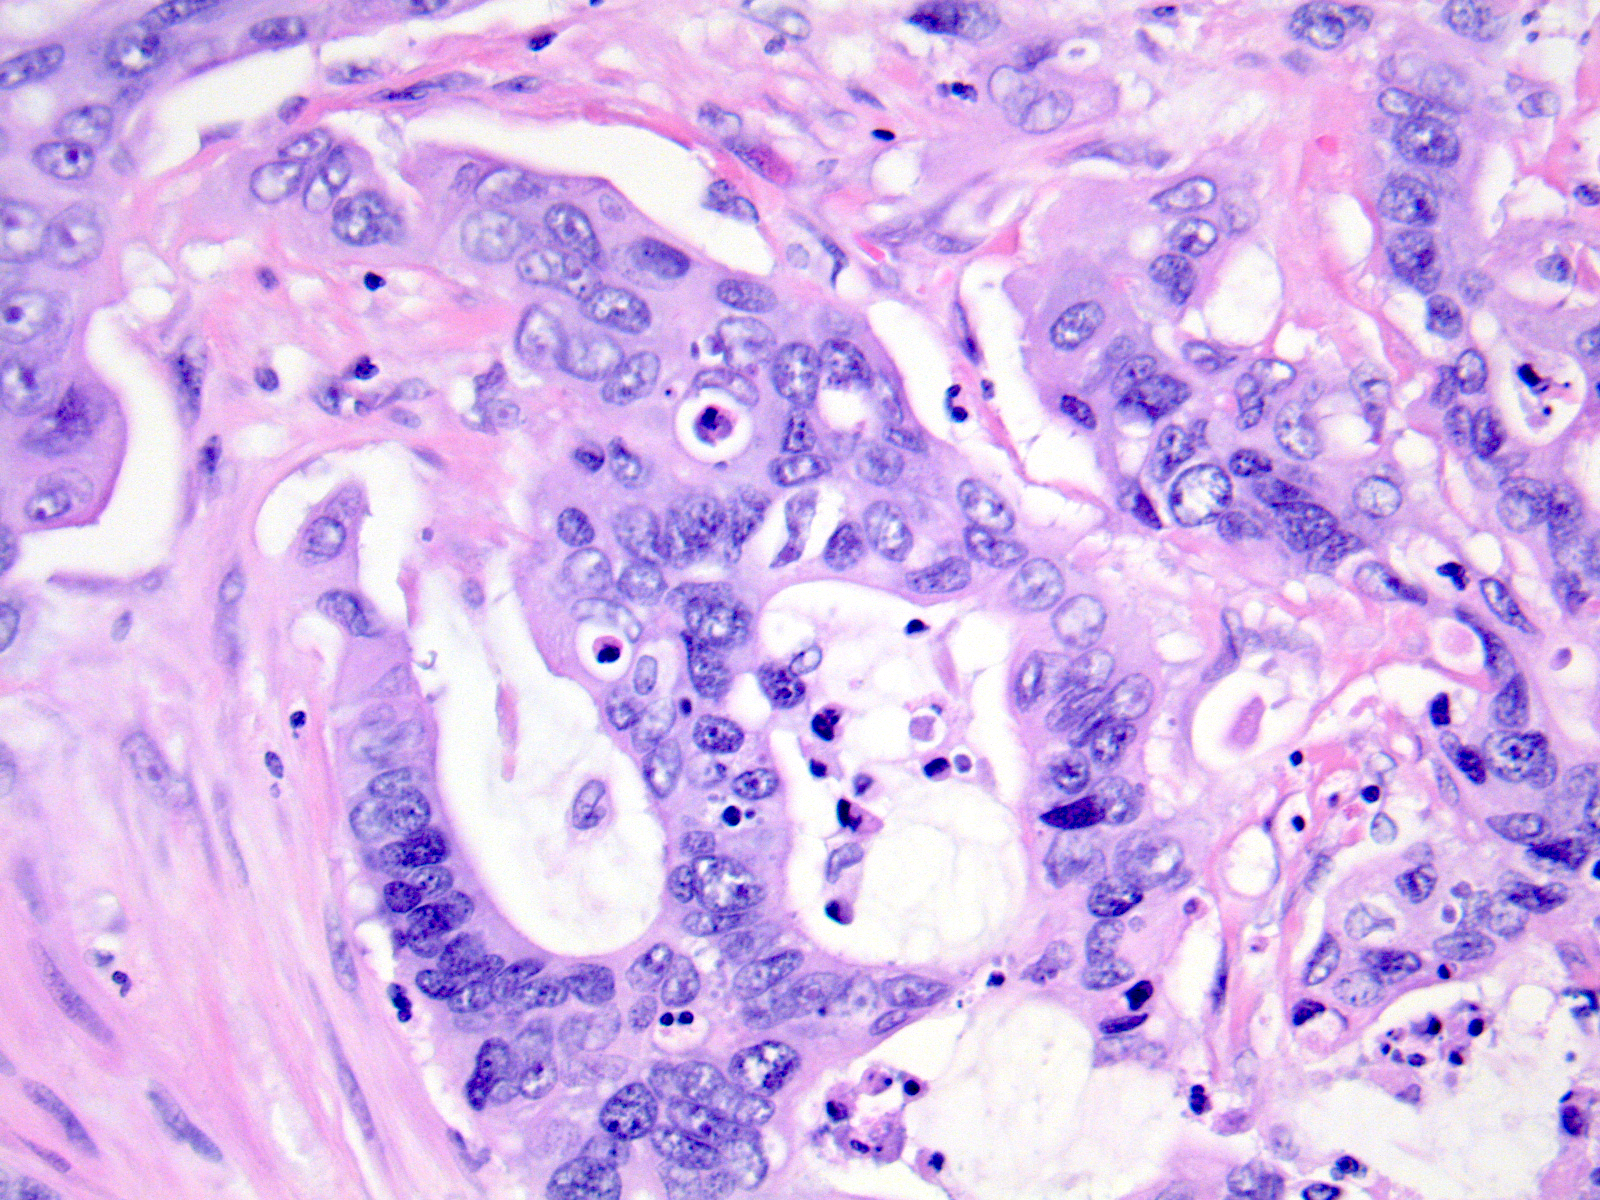

In [20]:
# make prediction on single image
image_path = 'data/test/ColonACA/Image 099.jpeg'

dx = learn.predict(image_path)[0]
if dx == 'ColonACA':
    print('This image most likely belongs to Colon Adenocarcinoma.')
else:
    print('This image most likely belongs to Lung Adenocarcinoma.')
PIL.Image.open(image_path)

This image most likely belongs to Lung Adenocarcinoma.


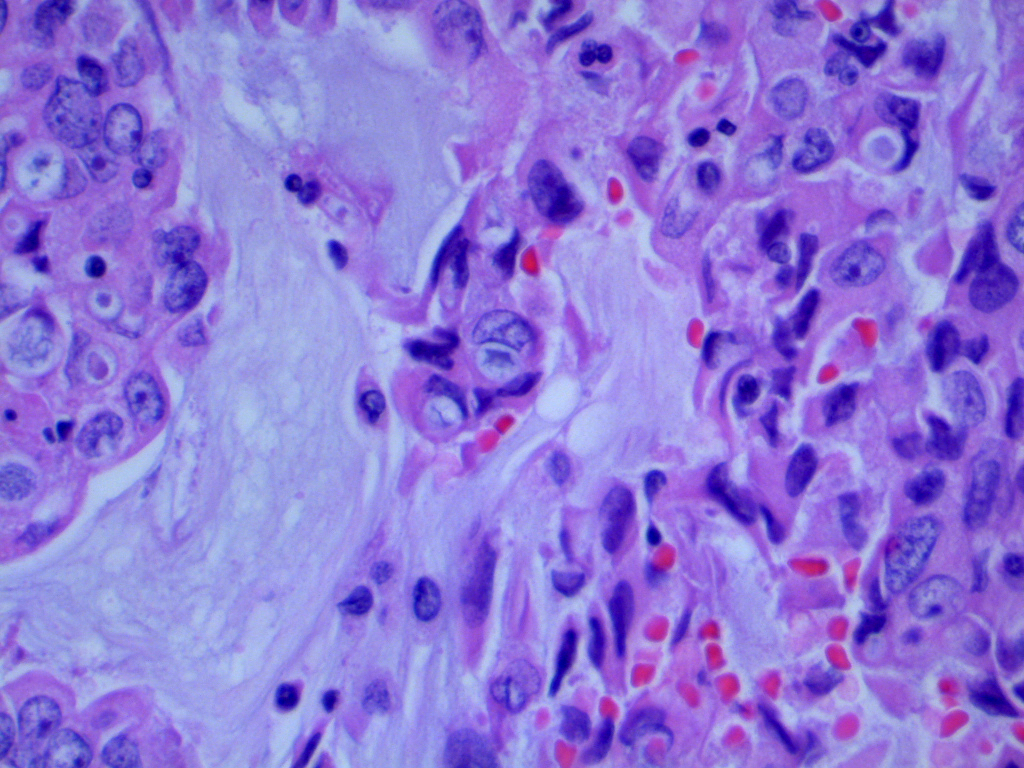

In [21]:
# make prediction on single image
image_path = 'data/test/LungACA/Image056.jpeg'

dx = learn.predict(image_path)[0]
if dx == 'ColonACA':
    print('This image most likely belongs to Colon Adenocarcinoma.')
else:
    print('This image most likely belongs to Lung Adenocarcinoma.')
PIL.Image.open(image_path)